In [1]:
#!pip install --upgrade scikit-learn (update to version 0.22 if needed)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn #MAKE SURE AT LEAST V0.22
print('The scikit-learn version is {}.'.format(sklearn.__version__))
sns.set(style='white',palette='GnBu_d')
sns.set_style("ticks")

The scikit-learn version is 0.23.0.


# Contents
1. Data Overview
2. EDA
3. Data Cleaning
4. Modeling (Contains Final Model and Results)
5. Impact of COVID-19 on academics, healthcare, internet, psychological well-being, and social well-being (by gender, degree, living situation)
6. Analysis of Free Response Data
7. Impact of COVID-19 on academics, healthcare, internet, psychological well-being, and social well-being (by public or private institutions)
8. Appendix (Extra Visualizations and Exploration)

# 1. Data Overview

In [3]:
data = pd.read_csv(r"./Data/SurveyQuantitativeData_Downloaded_050820_1240PM.csv")
data.head(2)

,SubmissionDate,starttime,endtime,duration,consent,age,gender,degree,international,closure_cam,...,anx_nextmo_l,anx_summer_l,anx_longterm_l,inst_country_l,country_l,starttime_l,endtime_l,duration_m,duration_m_bins,KEY
0,2020-03-26T20:18:47.489Z,2020-03-26T20:14:11.009Z,2020-03-26T20:18:47.454Z,276,1,29.0,1.0,3.0,1.0,1.0,...,Much Worse,Much Worse,Same,United States of America (USA),United States of America (USA),43916.84318,NaN,4.60,< 05min,uuid:6eea9132-51d2-4374-86b3-b6c0f577320f
1,2020-03-26T20:23:23.636Z,2020-03-26T20:12:44.933Z,2020-03-26T20:23:23.601Z,639,1,28.0,1.0,3.0,0.0,1.0,...,Much Worse,Much Worse,Worse,United States of America (USA),United States of America (USA),43916.84218,NaN,10.65,< 20min,uuid:dcfed972-e812-4f55-b2de-eb84c15f94bb


In [4]:
data.columns.values

array(['SubmissionDate', 'starttime', 'endtime', 'duration', 'consent',
       'age', 'gender', 'degree', 'international', 'closure_cam',
       'closure_res', 'closure_date', 'location', 'location_perm',
       'living', 'vulnerable', 'quarantine', 'experienced', 'dis_label',
       'dis_healthcare', 'dis_internet', 'dis_academic', 'dis_social',
       'dis_psych', 'change', 'fin_exp', 'fin_inc', 'fin_aid', 'fin_debt',
       'exp_type', 'exp_more', 'exp_less', 'inc_more', 'inc_less',
       'aid_more', 'aid_less', 'debt_more', 'debt_less', 'inst_response',
       'anx_label', 'anx_nextmo', 'anx_summer', 'anx_longterm',
       'inst_country', 'country', 'consent_l', 'gender_l', 'degree_l',
       'international_l', 'closure_cam_l', 'closure_res_l', 'location_l',
       'location_perm_l', 'living_l', 'vulnerable_l', 'quarantine_l',
       'dis_healthcare_l', 'dis_internet_l', 'dis_academic_l',
       'dis_social_l', 'dis_psych_l', 'fin_exp_l', 'fin_inc_l',
       'fin_aid_l', 'fin_debt

# 2. EDA

We initially investigated who responded to the COVID-19 Student Impact Survey.

Woman    555
Man      262
Other     11
Name: gender_l, dtype: int64


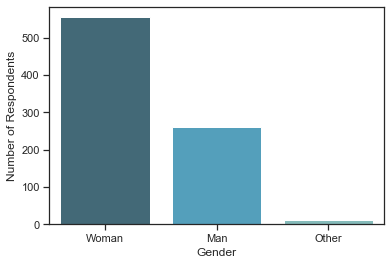

In [5]:
demo_data = data[data['consent'] == 1]
#figure for gender information
gender_count = demo_data['gender_l'].value_counts()
print(gender_count)

gender_plot = sns.countplot(x="gender_l", data=demo_data, palette="GnBu_d")
gender_plot.set(xlabel='Gender', ylabel='Number of Respondents')
plt.show()

Masters          308
Undergraduate    302
Doctoral         203
Other              5
Advanced           2
Name: degree_l, dtype: int64


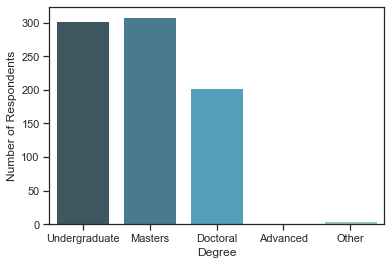

In [6]:
#figure for degree
degree_count = demo_data['degree_l'].value_counts()
print(degree_count)

degree_plot = sns.countplot(x="degree_l", data=demo_data, palette="GnBu_d", 
                            order =['Undergraduate', 'Masters', 'Doctoral', 'Advanced', 'Other'])
degree_plot.set(xlabel='Degree', ylabel='Number of Respondents')
plt.show()

Family       480
Roommates    207
Alone        117
Name: living_l, dtype: int64


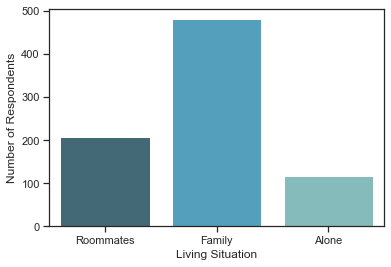

In [7]:
#figure for living
living_count = demo_data['living_l'].value_counts()
print(living_count)

living_plot = sns.countplot(x="living_l", data=demo_data, palette="GnBu_d")
living_plot.set(xlabel='Living Situation', ylabel='Number of Respondents')
plt.show()

We then look at null values.

Median:13.0


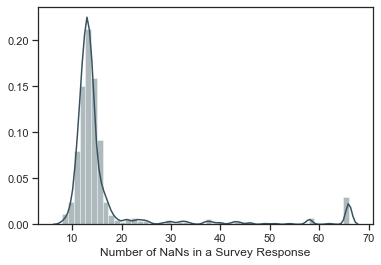

In [8]:
sns.distplot(np.sum(data.isnull(), axis=1))
plt.xlabel('Number of NaNs in a Survey Response');
print('Median:{}'.format(np.sum(data.isnull(), axis=1).median()))

The plot above shows that most responses have between 10 and 20 NaNs but there are a few that have large amounts of NaNs in the response. The responses (rows) had a median of 13 null values, some of which were accounted for by empty columns that encoded section labels. 

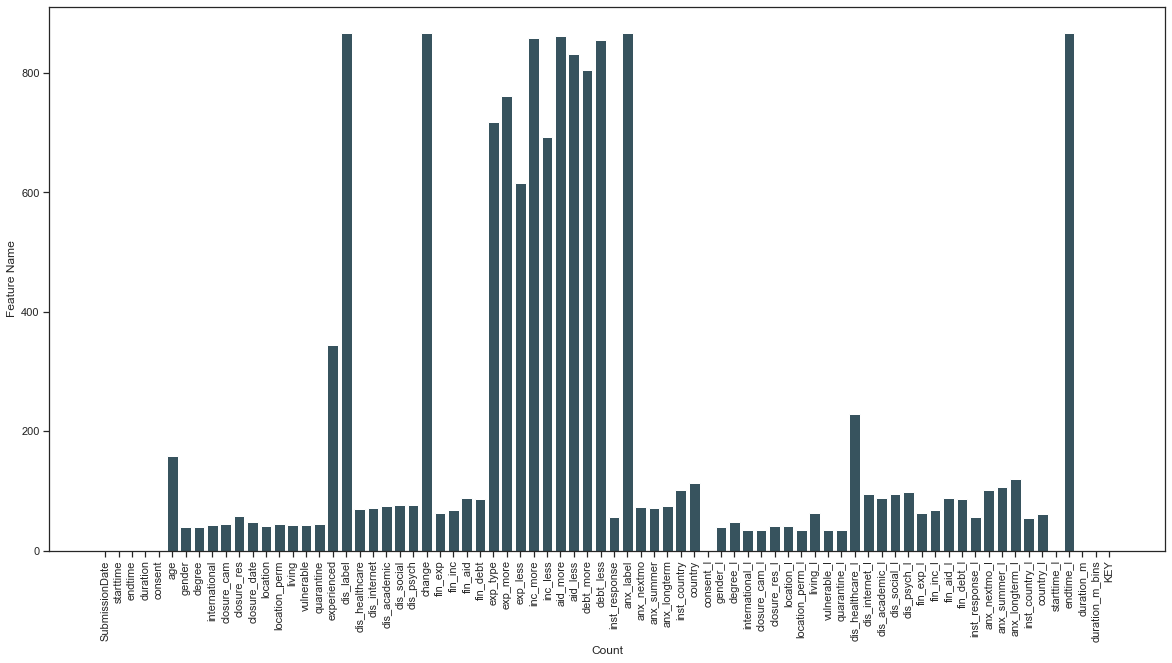

In [9]:
plt.figure(figsize=(20,10))
plt.bar(x=data.columns.values, height=np.sum(data.isnull(), axis=0))
plt.xlabel('Count')
plt.ylabel('Feature Name')
plt.xticks(rotation=90);

The plot above reveals which features have large numbers of NaNs. Some of these are NaNs because they are simply encoding a label (for example, dis_label). Features (columns) that involved write-in or check-all-that-apply answers such as those in the entire “fin_followup” section and experienced in the “disruption” section had null values in a majority of the responses. 

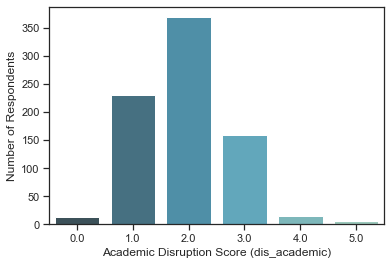

In [10]:
ax = sns.countplot(data['dis_academic'])
plt.xlabel('Academic Disruption Score (dis_academic)')
plt.ylabel('Number of Respondents');

The plot above shows how survey respondents answered the question about changes to their ability to pursue studies due to COVID-19. 0 is N/A or Don't Know, 1 is Much Worse than Before, 2 is Worse than Before, 3 is Same as Before, 4 is Better than Before, and 5 is Much Better than Before. The plot is slightly skewed to the right.

Next, rows that were unusable were accounted for. If the respondents selected ‘No’ for the very first consent question, indicating that they either did not want to participate in the survey and/or were not 18 years or older, any further responses were null. There were 27 respondents in the data who did not consent and these responses were dropped before moving forward. The data was then split to create a training set.

In [11]:
def presplit_removal(input_data, target_var):
    new_data = input_data[input_data['consent'] == 1] #Removes responses where there is no consent
    new_data = new_data.dropna(subset=[target_var]) #Removes responses where the target variable (y) is a NaN
    new_data = new_data[new_data[target_var] != 0] #Removes responses where the target variable (y) is a 0
    return new_data

In [12]:
presplit_data = presplit_removal(data, 'dis_academic')

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
train, test = train_test_split(presplit_data, test_size=0.2, random_state=42)

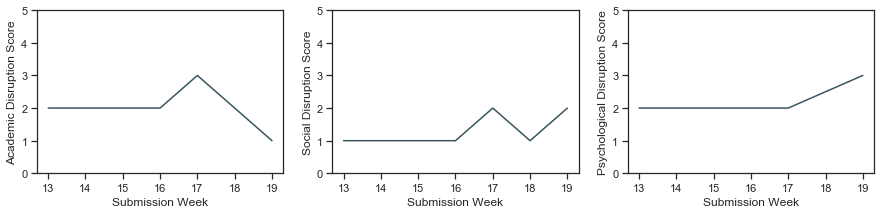

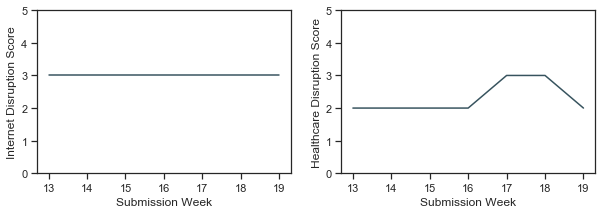

In [14]:
train_copy = train.copy()
train_copy['submission_week'] = pd.to_datetime(train_copy['SubmissionDate']).dt.week
fig1, (ax11, ax12, ax13) = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(15,3))
fig1b, (ax14, ax15) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(10,3))
sns.lineplot(x='submission_week',y='dis_academic', data=train_copy, estimator=np.median, ax=ax11, ci=None)
sns.lineplot(x='submission_week',y='dis_social', data=train_copy, estimator=np.median, ax=ax12, ci=None)
sns.lineplot(x='submission_week',y='dis_psych', data=train_copy, estimator=np.median, ax=ax13, ci=None)
sns.lineplot(x='submission_week',y='dis_internet', data=train_copy, estimator=np.median, ax=ax14, ci=None)
sns.lineplot(x='submission_week',y='dis_healthcare', data=train_copy, estimator=np.median, ax=ax15, ci=None)
ax11.set_ylim([0, 5]); ax11.set_xlabel('Submission Week'); ax11.set_ylabel('Academic Disruption Score')
ax12.set_ylim([0, 5]); ax12.set_xlabel('Submission Week'); ax12.set_ylabel('Social Disruption Score')
ax13.set_ylim([0, 5]); ax13.set_xlabel('Submission Week'); ax13.set_ylabel('Psychological Disruption Score')
ax14.set_ylim([0, 5]); ax14.set_xlabel('Submission Week'); ax14.set_ylabel('Internet Disruption Score')
ax15.set_ylim([0, 5]); ax15.set_xlabel('Submission Week'); ax15.set_ylabel('Healthcare Disruption Score');

The plots above were created to see if there was a difference between some of the variables if they were from survey responses submitted later (since the situation has been changing). They show the median response (once again, the Likert scale so that a lower number corresponds to "worse"). Although there seemed to be a relationship, it was not necessarily consistent.  

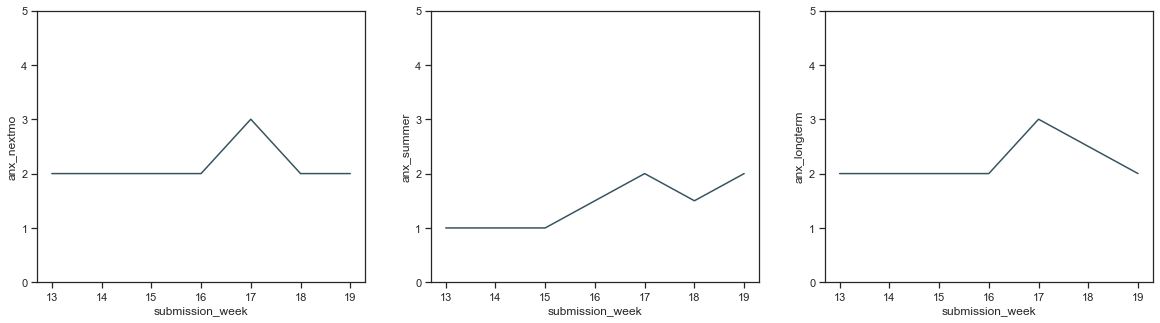

In [15]:
fig2, (ax21, ax22, ax23) = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(20,5))
sns.lineplot(x='submission_week',y='anx_nextmo', data=train_copy, estimator=np.median, ax=ax21, ci=None)
sns.lineplot(x='submission_week',y='anx_summer', data=train_copy, estimator=np.median, ax=ax22, ci=None)
sns.lineplot(x='submission_week',y='anx_longterm', data=train_copy, estimator=np.median, ax=ax23, ci=None)
ax21.set_ylim([0, 5])
ax22.set_ylim([0, 5])
ax23.set_ylim([0, 5]);

Similarly, the median response by submission week is shown for the variables related to anxiety (next month, summer, longterm). These plots caused us to decide to include the submission week as a feature, in case it affected the outcome.

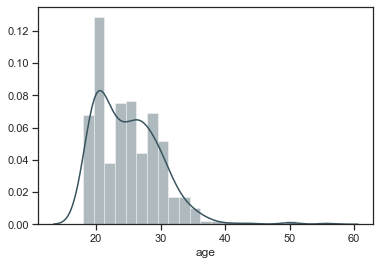

In [16]:
sns.distplot(train_copy['age']);

The plot above shows a distribution of the ages found in the data.

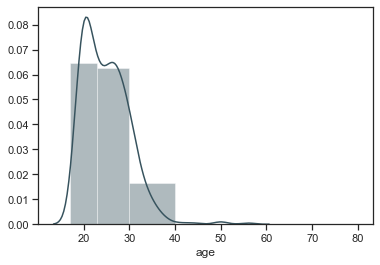

In [17]:
sns.distplot(train_copy['age'], bins=[17,23,30,40,80]);

The ages were binned in what we thought was a more meaningful way by trying to capture the ages of undergraduates and then other stages of life represented by decade. We realize that this was not necessarily representative of all students.

In [18]:
table = pd.crosstab(train_copy['degree'], train_copy['dis_academic'], margins = False) #Vary feature in 1st position 
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
p

0.0014346253821008014

Performing a chi-squared test on some of the categorical variables gave us an idea of what features might be important.

# 3. Data Cleaning

In general, to avoid losing data, an unknown category was added to each categorical feature unless there was already an "other" or "N/A" option. Features with potential high dimensionality like country and inst_country were grouped so they only indicated if the country was the US or not (this, of course, meant losing information). Any fill-in or check-all-that-apply features were dropped. Age was binned to become a categorical variable since there were so many missing values.

In [19]:
def data_cleaning(raw_data, target_var):
    clean_data = raw_data.drop(columns=['starttime', 'endtime', 'duration','dis_label','change',
                                        'anx_label','closure_date','experienced','exp_type','exp_more','exp_less', 
                                        'inc_more', 'inc_less','aid_more','aid_less', 'debt_more', 'debt_less',
                                        'starttime_l','endtime_l','duration_m', 'duration_m_bins', 'KEY'])
    labels = ['consent', 'gender', 'degree','international', 'closure_cam', 'closure_res', 'location','location_perm', 
              'living', 'vulnerable', 'quarantine','dis_healthcare', 'dis_internet', 'dis_academic','dis_social', 
              'dis_psych', 'fin_exp', 'fin_inc','fin_aid', 'fin_debt', 'inst_response', 'anx_nextmo','anx_summer', 
              'anx_longterm', 'inst_country', 'country'] #list of duplicate columns
    for feature in labels:
        clean_data[feature].fillna(clean_data[feature+'_l'], inplace=True) #fill orig. column from duplicate column if possible 
    clean_data = clean_data.drop(columns=[label+'_l' for label in labels]) #drop duplicate column 
    clean_data = clean_data.replace('No', 0) #replace text versions
    clean_data = clean_data.replace('Domestic', 0)
    clean_data = clean_data.replace('United States of America (USA)', 0)
    clean_data['age_group'] = pd.cut(x=clean_data['age'], bins=[17,23,30,40,80], labels=['ug','mid20s','30s', '40+']) #bin ages
    clean_data['age_group'] = clean_data['age_group'].cat.add_categories('unknown').fillna('unknown') #add unknown cat.
    clean_data['gender'] = clean_data['gender'].fillna(4) #NaNs to cat. not listed or prefer not to answer
    clean_data['degree'] = clean_data['degree'].fillna(5) #NaNs to other cat.
    clean_data['location'] = clean_data['location'].fillna(5) #create unknown cat.
    clean_data[['closure_cam','closure_res','location_perm']] = clean_data[['closure_cam','closure_res','location_perm']].fillna(2) #create unknown cat.
    clean_data[['dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']] = clean_data[['dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']].fillna(0) #NaNs to N/A cat.   
    clean_data[['fin_exp','fin_inc','fin_aid','fin_debt']] = clean_data[['fin_exp','fin_inc','fin_aid','fin_debt']].fillna(0) #NaNs to N/A cat.    
    clean_data['inst_response'] = clean_data['inst_response'].fillna(4) #create unknown cat.
    clean_data[['anx_nextmo','anx_summer','anx_longterm']] = clean_data[['anx_nextmo','anx_summer','anx_longterm']].fillna(0) #NaNs to N/A cat.    
    clean_data[['inst_country','country']] = clean_data[['inst_country','country']].fillna(-1) #add unknown cat
    clean_data.loc[clean_data['inst_country'] > 0, 'inst_country'] = 1 #change to US or not US
    clean_data.loc[clean_data['country'] > 0, 'country'] = 1
    clean_data['submission_week'] = pd.to_datetime(clean_data['SubmissionDate']).dt.week #add submission week variable
    clean_data = clean_data.drop(columns=['consent','age','SubmissionDate']) #drop unused columns
    return clean_data

The target variable (dis_academic) was coded in two ways. In feature_target_split, answers of "Much Worse than Before" and "Worse than Before" were labeled 0 and anything better was labeled 1. In feature_target_split_extreme, answers of "Much Worse than Before" were labeled 1 and anything better was labeled 1. 

In [20]:
def feature_target_split(cleaned_data, target_var):
    X = cleaned_data.drop(columns=[target_var])
    y = cleaned_data[target_var]
    y = y.replace([1, 2], 0)
    y = y.replace([3, 4, 5], 1)
    return X, y

In [21]:
def feature_target_split_extreme(cleaned_data, target_var):
    X = cleaned_data.drop(columns=[target_var])
    y = cleaned_data[target_var]
    y = y.replace([2, 3, 4, 5], 0) ##Changed target
    return X, y

# 4. Modeling

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_precision_recall_curve

The following are functions that were used in the modeling and feature selection process.

In [23]:
def selecting_model(x_train, y_train, clf_pipeline):
    #Does cross validation and outputs a sample precision-recall plot for a given classifier (already pre-processed)
    x_tr, x_te, y_tr, y_te = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    clf_pipeline.fit(x_tr, y_tr)
    print("Confusion Matrix on a Random Test Set:")
    print(confusion_matrix(y_te,clf_pipeline.predict(x_te)))
    plot_precision_recall_curve(clf_pipeline, x_te, y_te)
    plt.show()
    print("Average CV F1 Score:{}".format(cross_val_score(clf_pipeline, x_train, y_train, cv=5, scoring='f1').mean()))

In [24]:
def ranked_features(selector, feature_names):
    #Prints outputs of any selector (in this case, recursive feature elimination) results
    rank = list(selector.named_steps['selector'].ranking_)
    ranked_features = [feature_names[ind] for ind, x in enumerate(rank) if x == 1]
    print(ranked_features)

def log_reg_coeffs(clf, feature_names):
    #Prints coefficients that were and were not set to 0 by L1 regularization for LogReg
    coeffs = pd.DataFrame(clf.named_steps['classifier'].coef_, columns=feature_names)
    clf.named_steps['classifier'].coef_, clf.named_steps['classifier'].intercept_, 
    print("Coefficients used:")
    print(coeffs.T[coeffs.T[0] != 0].index.values)
    print("Coefficients set to 0:")
    print(coeffs.T[coeffs.T[0] == 0].index.values)

def rf_features(clf,feature_names):
    #https://taken from: scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    #Prints a ranking of feature importance from random forest
    importances = clf.named_steps['classifier'].feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.named_steps['classifier'].estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(0, len(feature_names)):
        print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(0,len(feature_names)), importances[indices],
    color="r", yerr=std[indices], align="center")
    #plt.xticks(range(0,len(feature_names)), indices)
    plt.xlim([-1, len(feature_names)])
    plt.show()

The training data was run through the cleaning function. 

In [25]:
cleaned = data_cleaning(train, 'dis_academic')

## Case 1A: Using all features <br> Separating "Worse or below" (<3) from "Same or above" ( >=3) for dis_academic

In [26]:
Xtrain, Ytrain = feature_target_split(cleaned, 'dis_academic')
original_colnames = list(Xtrain.columns.values) #all original features
onehot_features = list(Xtrain.columns.values)
onehot_features.remove('submission_week') #only categorical features

Checking how the new target variable might be affected by some of the features.

In [27]:
table = pd.crosstab(Xtrain['degree'], Ytrain, margins = False)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
p

0.035486058494208994

Including all the possible categories since new ones cannot be added (only limited number of options in the survey). The categorical variables are one-hot encoded and the numeric variables are standardized.

In [28]:
category_values = [[1,2,3,4],[1,2,3,4,5],[0,1],[0,1,2],[0,1,2],[1,2,3,4],[0,1,2],[1,2,3],[0,1],[0,1],
                   [0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3],[0,1,2,3],[0,1,2,3],
                   [0,1,2,3],[1,2,3,4],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[-1,0,1],[-1,0,1],
                   ['mid20s', 'ug', '30s', 'unknown', '40+']]
prep = ColumnTransformer(transformers=[('numeric', StandardScaler(), ['submission_week'])], remainder=OneHotEncoder(categories=category_values))

Confusion Matrix on a Random Test Set:
[[90  6]
 [22  7]]


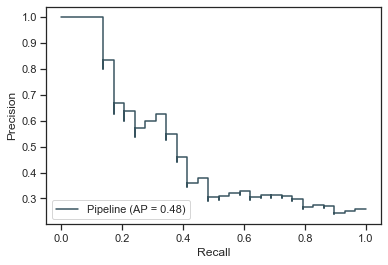

Average CV F1 Score:0.2991117654275549


In [29]:
classifier = LogisticRegression(penalty='l1',solver='liblinear', C=100) #Manually tuned C
clf1 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])
selecting_model(Xtrain, Ytrain, clf1)

The results of a logistic regression are shown above. The average f1 score and the confusion matrix show that there are many false negatives (people that are classified as doing worse but actually said they were the same or better).

Confusion Matrix on a Random Test Set:
[[77 19]
 [21  8]]


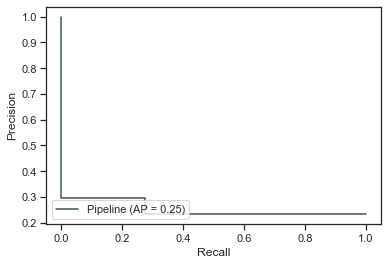

Average CV F1 Score:0.2992326473665853


In [30]:
classifier = RandomForestClassifier(n_estimators=1)
clf2 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])    
selecting_model(Xtrain, Ytrain, clf2)

The random forest only does slightly better. It has a lot of false positives (people who were classified as doing same or better but were actually doing worse). Both of these models do not seem to separate the groups particularly well.

## Case 1B: Using all features <br> Separating "Much worse" (1) from "Worse or above" ( >=2) for dis_academic

### Logistic Regression

In [31]:
Xtrain, Ytrain = feature_target_split_extreme(cleaned, 'dis_academic')
original_colnames = list(Xtrain.columns.values) #all original features
onehot_features = list(Xtrain.columns.values)
onehot_features.remove('submission_week') #only categorical features

In [32]:
category_values = [[1,2,3,4],[1,2,3,4,5],[0,1],[0,1,2],[0,1,2],[1,2,3,4],[0,1,2],[1,2,3],[0,1],[0,1],
                   [0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3],[0,1,2,3],[0,1,2,3],
                   [0,1,2,3],[1,2,3,4],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[-1,0,1],[-1,0,1],
                   ['mid20s', 'ug', '30s', 'unknown', '40+']]

prep = ColumnTransformer(transformers=[('numeric', StandardScaler(), ['submission_week'])], remainder=OneHotEncoder(categories=category_values))

Confusion Matrix on a Random Test Set:
[[73 12]
 [20 20]]


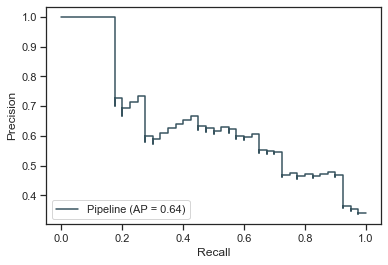

Average CV F1 Score:0.4843525436350751


In [33]:
classifier = LogisticRegression(penalty='l1',solver='liblinear', C=100) 
clf1 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])
selecting_model(Xtrain, Ytrain, clf1)

The logistic regression to separate out the group of "Much worse" is shown above. Once again, it does not perform particularly well. It does do better, but there is also less class imbalance when the target is grouped in this way. 

### Looking at Important Features (Added at the end)

Since we decided to use these two models, we look at the important features by trying different feature selection methods.

The following uses cross-validation and RFE to fidn the best selection of features for the logistic regression

In [34]:
selector = Pipeline(steps=[('preprocessor', prep),('selector',RFECV(estimator=classifier, scoring='f1', min_features_to_select=5))])
selector = selector.fit(Xtrain, Ytrain)
feature_names = list(clf1.named_steps['preprocessor'].transformers_[1][1].get_feature_names(onehot_features))    
feature_names.insert(0, 'submission_week')

In [35]:
ranked_features(selector, feature_names)

['degree_1.0', 'degree_4.0', 'degree_5.0', 'closure_cam_0.0', 'closure_res_2.0', 'location_4.0', 'living_1.0', 'vulnerable_1.0', 'quarantine_0.0', 'quarantine_1.0', 'dis_healthcare_2.0', 'dis_healthcare_4.0', 'dis_healthcare_5.0', 'dis_internet_0.0', 'dis_internet_1.0', 'dis_internet_4.0', 'dis_social_0.0', 'dis_social_3.0', 'dis_social_4.0', 'dis_social_5.0', 'dis_psych_0.0', 'dis_psych_1.0', 'dis_psych_4.0', 'dis_psych_5.0', 'fin_exp_0.0', 'fin_exp_3.0', 'fin_inc_0.0', 'fin_inc_3.0', 'fin_aid_1.0', 'fin_aid_3.0', 'fin_debt_0.0', 'fin_debt_1.0', 'fin_debt_3.0', 'inst_response_4.0', 'anx_nextmo_0.0', 'anx_nextmo_3.0', 'anx_nextmo_4.0', 'anx_nextmo_5.0', 'anx_summer_0.0', 'anx_summer_1.0', 'anx_summer_2.0', 'anx_summer_4.0', 'anx_summer_5.0', 'anx_longterm_2.0', 'anx_longterm_3.0', 'anx_longterm_5.0', 'inst_country_1.0', 'country_1.0', 'age_group_40+']


The following uses RFE to find the best selection of 5 features for the logistic regression.

In [36]:
selector_fivefeatures = Pipeline(steps=[('preprocessor', prep),('selector',RFE(estimator=classifier, n_features_to_select=5))])
selector_fivefeatures = selector_fivefeatures.fit(Xtrain, Ytrain)

In [37]:
ranked_features(selector_fivefeatures, feature_names)

['degree_4.0', 'dis_healthcare_5.0', 'dis_social_4.0', 'inst_response_4.0', 'anx_nextmo_4.0']


The following tries to determine the important features using the coefficients of the logistic regression, since some of them have been set to 0 using the L1 regularization.

In [38]:
log_reg_coeffs(clf1, feature_names)

Coefficients used:
['submission_week' 'gender_2.0' 'gender_4.0' 'degree_1.0' 'degree_2.0'
 'degree_3.0' 'degree_4.0' 'degree_5.0' 'international_1.0'
 'closure_cam_0.0' 'closure_res_1.0' 'closure_res_2.0' 'location_1.0'
 'location_2.0' 'location_3.0' 'location_4.0' 'location_perm_0.0'
 'location_perm_1.0' 'living_1.0' 'living_2.0' 'living_3.0'
 'vulnerable_0.0' 'vulnerable_1.0' 'quarantine_0.0' 'quarantine_1.0'
 'dis_healthcare_0.0' 'dis_healthcare_1.0' 'dis_healthcare_2.0'
 'dis_healthcare_3.0' 'dis_healthcare_5.0' 'dis_internet_0.0'
 'dis_internet_1.0' 'dis_internet_2.0' 'dis_internet_3.0'
 'dis_internet_4.0' 'dis_internet_5.0' 'dis_social_0.0' 'dis_social_1.0'
 'dis_social_2.0' 'dis_social_3.0' 'dis_social_4.0' 'dis_social_5.0'
 'dis_psych_0.0' 'dis_psych_1.0' 'dis_psych_3.0' 'dis_psych_4.0'
 'dis_psych_5.0' 'fin_exp_0.0' 'fin_exp_2.0' 'fin_exp_3.0' 'fin_inc_0.0'
 'fin_inc_1.0' 'fin_inc_2.0' 'fin_inc_3.0' 'fin_aid_0.0' 'fin_aid_1.0'
 'fin_aid_2.0' 'fin_aid_3.0' 'fin_debt_0.0' 'fin_d

### Logistic Regression on All Data (Added at the end)

We ran the model on all of the data in the end because we wanted to see how well it understood this particular dataset, rather than focusing on predicting any future students.

LogReg Precision: 0.6923076923076923
LogReg Recall: 0.508695652173913
LogReg F1: 0.5864661654135338


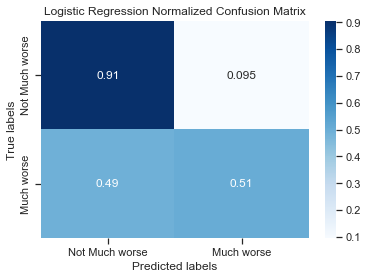

In [39]:
final = data_cleaning(presplit_data, 'dis_academic')
Xfinal, Yfinal = feature_target_split_extreme(final, 'dis_academic')
clf1.predict(Xfinal)
y1_pred = clf1.predict(Xfinal)
print("LogReg Precision: {}".format(sklearn.metrics.precision_score(Yfinal,y1_pred)))
print("LogReg Recall: {}".format(sklearn.metrics.recall_score(Yfinal,y1_pred)))
print("LogReg F1: {}".format(sklearn.metrics.f1_score(Yfinal,y1_pred)))
cm = confusion_matrix(Yfinal,y1_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap="Blues")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression Normalized Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Much worse', 'Much worse'])
ax.yaxis.set_ticklabels(['Not Much worse', 'Much worse'], va='center');

Overall, it seems to do only slightly better than a random classifier (which would have an f1 score of 0.5). 

### Random Forest

Confusion Matrix on a Random Test Set:
[[80  5]
 [24 16]]


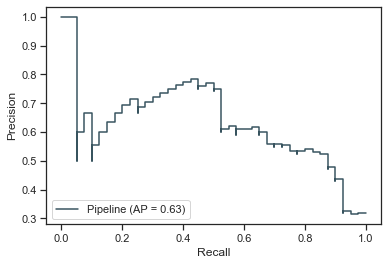

Average CV F1 Score:0.4460999499982143


In [40]:
classifier = RandomForestClassifier(n_estimators=500, random_state=42)
clf2 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])    
selecting_model(Xtrain, Ytrain, clf2)

Although the random forest model does better with this target grouping, it still is not very good based on the f1 score.

### Looking at Important Features (Added at the end)

The same procedure for looking at important features was followed as for the logistic regression model. However, the random forest does not provide coefficients but instead, feature importances, which can be ranked as shown below.

In [41]:
selector2 = Pipeline(steps=[('preprocessor', prep),('selector',RFECV(estimator=classifier, scoring='f1', min_features_to_select=5))])
selector2 = selector.fit(Xtrain, Ytrain)
    
feature_names = list(clf2.named_steps['preprocessor'].transformers_[1][1].get_feature_names(onehot_features))    
feature_names.insert(0, 'submission_week')

In [42]:
ranked_features(selector2, feature_names)

['degree_1.0', 'degree_4.0', 'degree_5.0', 'closure_cam_0.0', 'closure_res_2.0', 'location_4.0', 'living_1.0', 'vulnerable_0.0', 'quarantine_1.0', 'dis_healthcare_2.0', 'dis_healthcare_4.0', 'dis_healthcare_5.0', 'dis_internet_0.0', 'dis_internet_1.0', 'dis_internet_4.0', 'dis_social_0.0', 'dis_social_3.0', 'dis_social_4.0', 'dis_social_5.0', 'dis_psych_0.0', 'dis_psych_1.0', 'dis_psych_4.0', 'dis_psych_5.0', 'fin_exp_0.0', 'fin_exp_3.0', 'fin_inc_0.0', 'fin_inc_3.0', 'fin_aid_1.0', 'fin_aid_3.0', 'fin_debt_0.0', 'fin_debt_3.0', 'inst_response_4.0', 'anx_nextmo_0.0', 'anx_nextmo_3.0', 'anx_nextmo_4.0', 'anx_nextmo_5.0', 'anx_summer_0.0', 'anx_summer_2.0', 'anx_summer_4.0', 'anx_summer_5.0', 'anx_longterm_2.0', 'anx_longterm_3.0', 'anx_longterm_5.0', 'inst_country_1.0', 'country_1.0', 'age_group_40+']


In [43]:
selector2_fivefeatures = Pipeline(steps=[('preprocessor', prep),('selector',RFE(estimator=classifier, n_features_to_select=5))])
selector2_fivefeatures = selector_fivefeatures.fit(Xtrain, Ytrain)

In [44]:
ranked_features(selector2_fivefeatures, feature_names)

['degree_4.0', 'dis_healthcare_5.0', 'dis_social_4.0', 'inst_response_4.0', 'anx_nextmo_4.0']


A ranking of all of the feature importances from the random forest model.

Feature ranking:
1. feature dis_psych_1.0 (0.047407)
2. feature submission_week (0.034494)
3. feature anx_longterm_1.0 (0.026157)
4. feature anx_nextmo_1.0 (0.021053)
5. feature dis_healthcare_2.0 (0.020756)
6. feature dis_healthcare_3.0 (0.019460)
7. feature dis_psych_2.0 (0.019287)
8. feature dis_internet_3.0 (0.018974)
9. feature fin_inc_2.0 (0.018339)
10. feature fin_inc_1.0 (0.017763)
11. feature fin_exp_3.0 (0.017183)
12. feature fin_exp_2.0 (0.016506)
13. feature anx_nextmo_2.0 (0.015633)
14. feature fin_exp_1.0 (0.015371)
15. feature anx_summer_1.0 (0.015095)
16. feature location_2.0 (0.015035)
17. feature gender_1.0 (0.014976)
18. feature age_group_ug (0.014951)
19. feature dis_psych_3.0 (0.014892)
20. feature anx_summer_2.0 (0.014870)
21. feature anx_longterm_3.0 (0.014870)
22. feature anx_longterm_2.0 (0.014853)
23. feature inst_response_2.0 (0.014687)
24. feature dis_social_1.0 (0.014624)
25. feature degree_1.0 (0.014550)
26. feature dis_internet_2.0 (0.014532)
27. feature 

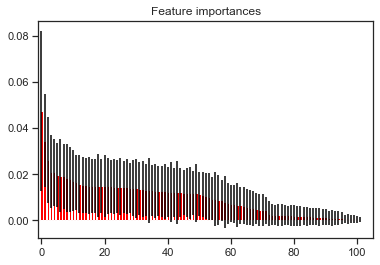

In [45]:
rf_features(clf2, feature_names)

### Random Forest on All Data (Added at the end)

Random Forest Precision: 0.9417989417989417
Random Forest Recall: 0.7739130434782608
Random Forest F1: 0.8496420047732696


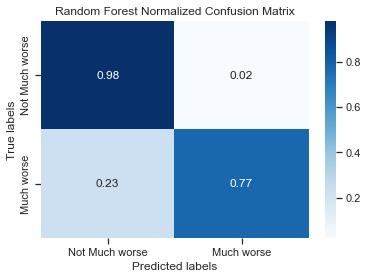

In [46]:
y2_pred = clf2.predict(Xfinal)
print("Random Forest Precision: {}".format(sklearn.metrics.precision_score(Yfinal,y2_pred)))
print("Random Forest Recall: {}".format(sklearn.metrics.recall_score(Yfinal,y2_pred)))
print("Random Forest F1: {}".format(sklearn.metrics.f1_score(Yfinal,y2_pred)))
cm = confusion_matrix(Yfinal,y2_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap="Blues")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest Normalized Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Much worse', 'Much worse'])
ax.yaxis.set_ticklabels(['Not Much worse', 'Much worse'], va='center');

Surprisingly, when run on the entire dataset, the random forest classifier does not do too badly, correctly classifying 77% of the "Much worse" cases. 

## Only a Limited Set of Features

Below are the trials using only features that did not have a subject reesponse (any Likert scale data in the feature matrix was removed). However, it was difficult to get anything useful out of these results regarding the importance of features since the classifier performed so poorly

## Case 2A:  Using only "objective" features <br> Separating "Worse or below" (<3) from "Same or above" ( >=3) for dis_academic

In [47]:
#way fewer features
cleaned_objective = cleaned.drop(columns=['dis_healthcare','dis_internet','dis_social','dis_psych',
                                         'fin_exp','fin_inc','fin_aid','fin_debt','inst_response',
                                         'anx_nextmo','anx_summer','anx_longterm','submission_week'])

In [48]:
Xtrain, Ytrain = feature_target_split(cleaned_objective, 'dis_academic')
original_colnames = list(Xtrain.columns.values) #all original features
onehot_features = list(Xtrain.columns.values)

category_values = [[1,2,3,4],[1,2,3,4,5],[0,1],[0,1,2],[0,1,2],[1,2,3,4],[0,1,2],[1,2,3],[0,1],[0,1],
                   [-1,0,1],[-1,0,1],
                   ['mid20s', 'ug', '30s', 'unknown', '40+']]

prep = ColumnTransformer(transformers=[('onehot', OneHotEncoder(categories=category_values), onehot_features)], remainder="passthrough")

### Logistic Regression

Confusion Matrix on a Random Test Set:
[[94  2]
 [29  0]]


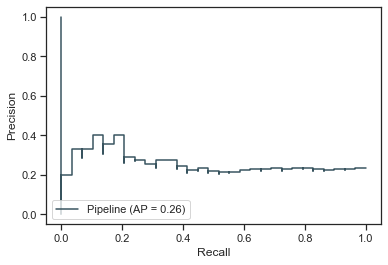

Average CV F1 Score:0.04586404586404587


In [49]:
classifier = LogisticRegression(penalty='l1',solver='liblinear', C=100) #need to tune C
clf1 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])
selecting_model(Xtrain, Ytrain, clf1)

### Random Forest

Confusion Matrix on a Random Test Set:
[[84 12]
 [28  1]]


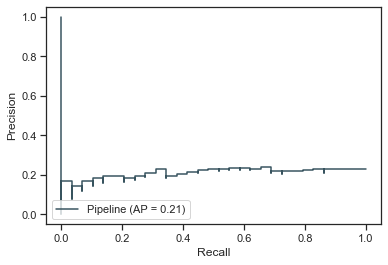

Average CV F1 Score:0.165872492701761


In [50]:
classifier = RandomForestClassifier(n_estimators=100,random_state=42)
clf2 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])    
selecting_model(Xtrain, Ytrain, clf2)

## Case 2B: Using only "objective" features <br> Separating "Much worse" (1) from "Worse or above" ( >=2) for dis_academic

In [51]:
Xtrain, Ytrain = feature_target_split_extreme(cleaned_objective, 'dis_academic')
original_colnames = list(Xtrain.columns.values) #all original features
onehot_features = list(Xtrain.columns.values)

category_values = [[1,2,3,4],[1,2,3,4,5],[0,1],[0,1,2],[0,1,2],[1,2,3,4],[0,1,2],[1,2,3],[0,1],[0,1],
                   [-1,0,1],[-1,0,1],
                   ['mid20s', 'ug', '30s', 'unknown', '40+']]

prep = ColumnTransformer(transformers=[('onehot', OneHotEncoder(categories=category_values), onehot_features)], remainder="passthrough")

### Logistic Regression

Confusion Matrix on a Random Test Set:
[[79  6]
 [35  5]]


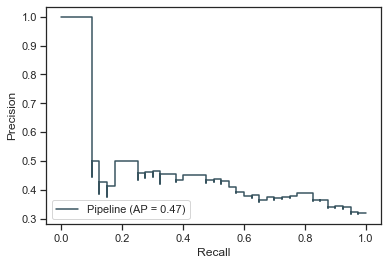

Average CV F1 Score:0.2519868764370043


In [52]:
classifier = LogisticRegression(penalty='l1',solver='liblinear', C=100) #need to tune C
clf1 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])
selecting_model(Xtrain, Ytrain, clf1)

### Random Forest

Confusion Matrix on a Random Test Set:
[[70 15]
 [28 12]]


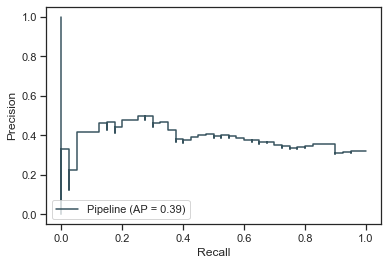

Average CV F1 Score:0.2978861951512723


In [53]:
classifier = RandomForestClassifier(n_estimators=100,random_state=42)
clf2 = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])    
selecting_model(Xtrain, Ytrain, clf2)

#  5. Impact of COVID-19 on academics, healthcare, internet, psychological well-being, and social well-being (by gender, degree, living situation)

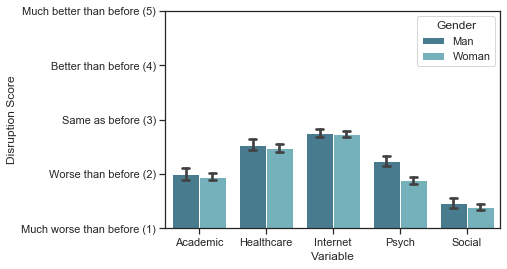

value    1.970475
dtype: float64
value    2.491393
dtype: float64
value    2.736093
dtype: float64
value    1.993498
dtype: float64
value    1.415803
dtype: float64


In [54]:
final_data = demo_data

h = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('gender_l')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.gender_l != 'Unknown')]
hm = hm[(hm.gender_l != 'Other')]
hm = hm[(hm.gender_l != 0)]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'gender_l':'Gender'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Gender', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)
plt.show()

a = a[(a.value != 0)]
print(a.mean())
h = h[(h.value != 0)]
print(h.mean())
i = i[(i.value != 0)]
print(i.mean())
p = p[(p.value != 0)]
print(p.mean())
s = s[(s.value != 0)]
print(s.mean())

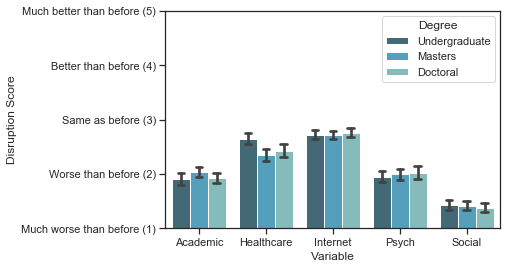

value    1.970475
dtype: float64
value    2.491393
dtype: float64
value    2.736093
dtype: float64
value    1.993498
dtype: float64
value    1.415803
dtype: float64


In [55]:
h = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('degree_l')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.degree_l != 'Unknown')]
hm = hm[(hm.degree_l != 0)]
hm = hm[(hm.degree_l != 'Advanced')]
hm = hm[(hm.degree_l != 'Other')]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'degree_l':'Degree'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Degree', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)
plt.show()

a = a[(a.value != 0)]
print(a.mean())
h = h[(h.value != 0)]
print(h.mean())
i = i[(i.value != 0)]
print(i.mean())
p = p[(p.value != 0)]
print(p.mean())
s = s[(s.value != 0)]
print(s.mean())

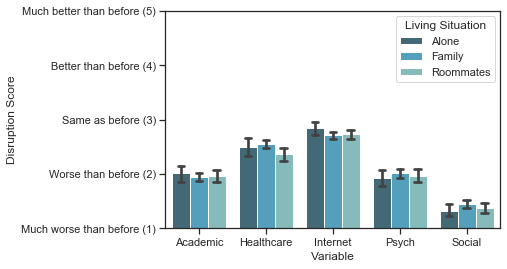

value    1.970475
dtype: float64
value    2.491393
dtype: float64
value    2.736093
dtype: float64
value    1.993498
dtype: float64
value    1.415803
dtype: float64


In [56]:
h = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('living_l')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.living_l != 'Unknown')]
hm = hm[(hm.living_l != 0)]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'living_l':'Living Situation'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Living Situation', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)
plt.show()

a = a[(a.value != 0)]
print(a.mean())
h = h[(h.value != 0)]
print(h.mean())
i = i[(i.value != 0)]
print(i.mean())
p = p[(p.value != 0)]
print(p.mean())
s = s[(s.value != 0)]
print(s.mean())

# 6. Analysis of Free Response Data

### Text Data Processing

In [57]:
text_data = pd.read_excel(r'./Data/textresponses_20200501.xlsx')
print("Total Free Responses:", len(text_data))

#The UNIVERSITY_KEY was created to introduced public or private classification
#We also had early plans to determine the grading adjustment and dorms decisions,
#however, the information varied across time and while a statement may have been 
#made the actions universities took were at time contradictory

university_key = pd.read_excel(r'./Data/University_Key.xlsx')

Total Free Responses: 857


In [58]:
#MERGE free response data with institutional information

#only keeps responses with a std_inst response
text_updated = pd.merge(text_data,
                 university_key,
                 on='std_inst',
                 how='left')

In [59]:
#now to drop un wanted columns
print("Total Responses with Univeristy Identified:", len(text_updated))
text_updated.isnull().sum()

Total Responses with Univeristy Identified: 857


basic_text        434
dis_healthcare     67
dis_internet       69
dis_academic       72
dis_social         73
dis_psych          73
inst_apprec       355
inst_wish         375
inst_help         435
inst_text         761
inst_country       96
institution       165
std_inst          165
pseudu_id           0
dummy_lang          0
CS_country        168
CS_inst           168
type_inst         168
dtype: int64

In [60]:
text_updated['final_country'] = np.where(text_updated['CS_country'].isnull(),text_updated['inst_country'],text_updated['CS_country'])

#now to drop values more values that don't mean much
text_updated = text_updated.drop(columns=['inst_country', 'institution', 'std_inst', 'CS_country'])
text_updated.head(2)

,basic_text,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,inst_apprec,inst_wish,inst_help,inst_text,pseudu_id,dummy_lang,CS_inst,type_inst,final_country
0,NaN,N/A or Don't Know,N/A or Don't Know,Much worse than before,Much worse than before,Much worse than before,NaN,NaN,NaN,NaN,1,0,NaN,NaN,United States of America (USA)
1,Our university has moved fully to online instr...,Worse than before,Worse than before,Worse than before,Much worse than before,Worse than before,Move everything online and stopped expecting g...,"this all earlier, and would have extended the ...",Pay us more. Now that we essentially must work...,NaN,2,0,"University of California, San Diego",Public,United States of America (USA)


In [61]:
#Nans were filled with zeros for ease of processing.
#Note however no zero values were used in the following  visualizations
text_updated = text_updated.fillna(0)
text_updated.isnull().sum()

basic_text        0
dis_healthcare    0
dis_internet      0
dis_academic      0
dis_social        0
dis_psych         0
inst_apprec       0
inst_wish         0
inst_help         0
inst_text         0
pseudu_id         0
dummy_lang        0
CS_inst           0
type_inst         0
final_country     0
dtype: int64

In [62]:
X=({"N/A or Don't Know": 0, 'Much worse than before':1, 'Worse than before':2,
       'Same as before':3, 'Better than before':4,
       'Much better than before':5})


text_updated['dis_healthcare'] = text_updated['dis_healthcare'].replace(X)
text_updated['dis_internet'] = text_updated['dis_internet'].replace(X)
text_updated['dis_academic'] = text_updated['dis_academic'].replace(X)
text_updated['dis_social'] = text_updated['dis_social'].replace(X)
text_updated['dis_psych'] = text_updated['dis_psych'].replace(X)

In [63]:
a_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_academic'] >0), 'dis_academic']
a_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_academic'] >0), 'dis_academic']
s_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_social'] >0), 'dis_social']
s_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_social'] >0), 'dis_social']
p_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_psych'] >0), 'dis_psych']
p_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_psych'] >0), 'dis_psych']
i_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_internet'] >0), 'dis_internet']
i_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_internet'] >0), 'dis_internet']
h_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']
h_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']

#  7. Impact of COVID-19 on academics, healthcare, internet, psychological well-being, and social well-being (by public or private institutions)

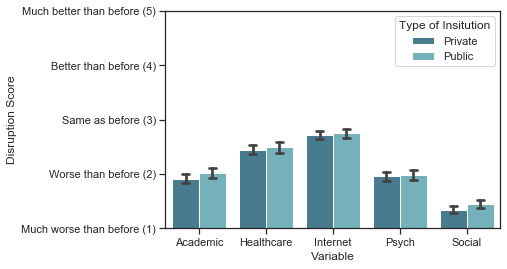

Well-being means by category and by institution type
Academic Public:  2.02
Academic Private:  1.92
Healthcare Public:  2.49
Healthcare Private:  2.45
Internet Public:  2.75
Internet Private:  2.72
Psychological Public:  1.97
Psychological Private:  1.95
Social Public:  1.45
Social Private:  1.34

Well-being means by category
Academic:  value    1.97
dtype: float64
Healthcare:  value    2.49
dtype: float64
Internet:  value    2.73
dtype: float64
Psychological:  value    1.99
dtype: float64
Social:  value    1.41
dtype: float64


In [64]:
final_data = text_updated

h = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_healthcare')])
i = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_internet')])
a = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_academic')])
s = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_social')])                     
p = pd.melt(final_data, id_vars=[('type_inst')],
        value_vars=[('dis_psych')])

hm = h.append(i)
hm = hm.append(a)
hm = hm.append(s)
hm = hm.append(p)
hm = hm[(hm.type_inst != 'Unknown')]
hm = hm[(hm.type_inst != 0)]
hm = hm[(hm.value != 0)]

vals =({"dis_healthcare": "Healthcare", 'dis_social':'Social', 'dis_psych':'Psych',
    'dis_internet':'Internet', 'dis_academic':'Academic'})

hm['variable'] = hm['variable'].replace(vals)
hm = hm.sort_values('variable')
hm.rename(columns={'type_inst':'Type of Insitution'}, 
                 inplace=True)

final = sns.barplot(x='variable', y='value', hue='Type of Insitution', data = hm, capsize=.1, palette="GnBu_d")

final.set(xlabel='Variable', ylabel='Disruption Score', ylim =(1,5))
y_values = [1,2,3,4,5]
y_new=['Much worse than before (1)', 'Worse than before (2)',
       'Same as before (3)', 'Better than before (4)',
       'Much better than before (5)']
plt.yticks(y_values, y_new)

plt.show()

#the following shows the well-being mean for each category by institution type
print('Well-being means by category and by institution type')
print('Academic Public: ', round(a_public.mean(),2))
print('Academic Private: ', round(a_private.mean(),2))
print('Healthcare Public: ', round(h_public.mean(),2))
print('Healthcare Private: ', round(h_private.mean(),2))
print('Internet Public: ', round(i_public.mean(),2))
print('Internet Private: ', round(i_private.mean(),2))
print('Psychological Public: ', round(p_public.mean(),2))
print('Psychological Private: ', round(p_private.mean(),2))
print('Social Public: ', round(s_public.mean(),2))
print('Social Private: ', round(s_private.mean(),2))

#the following shows the well-being mean by category
print()
print('Well-being means by category')
a = a[(a.value != 0)]
print('Academic: ', round(a.mean(),2))
h = h[(h.value != 0)]
print('Healthcare: ', round(h.mean(),2))
i = i[(i.value != 0)]
print('Internet: ', round(i.mean(),2))
p = p[(p.value != 0)]
print('Psychological: ', round(p.mean(),2))
s = s[(s.value != 0)]
print('Social: ', round(s.mean(),2))

In [65]:
text_updated['type_inst'].value_counts()

Private    439
Public     248
0          168
Unknown      2
Name: type_inst, dtype: int64

### Word Cloud of Respondent Countries

In [66]:
text_updated['final_country'].unique()

array(['United States of America (USA)', 'Canada', 'Austria',
       'Great Britain', 0, 'Turkey', 'France', 'Sweden', 'Pakistan',
       'Kenya', 'India', 'Hungary', 'Japan', 'Germany', 'Netherlands',
       'Switzerland', 'Morocco', 'Colombia', 'Czech Republic', 'China',
       'Belgium', 'Finland', 'Mexico', 'Turkmenistan', 'Italy', 'Uruguay',
       'Albania', 'Afghanistan', 'Philippines'], dtype=object)

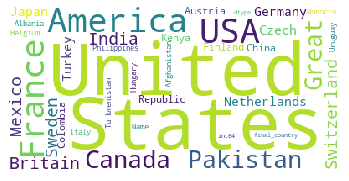

In [67]:
from wordcloud import WordCloud
text = text_updated['final_country'].value_counts()

wordcloud = WordCloud(background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 8. Appendix (Extra Visualizations and Exploration)

## Public Data

In [68]:
eda_plot_data = demo_data[['age', 'gender', 'degree', 'living', 'location',
                          'dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']].copy()
eda_plot_data.head(5)

,age,gender,degree,living,location,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych
0,29.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0
1,28.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
2,28.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,30.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0
4,NaN,1.0,3.0,1.0,1.0,0.0,3.0,1.0,1.0,2.0


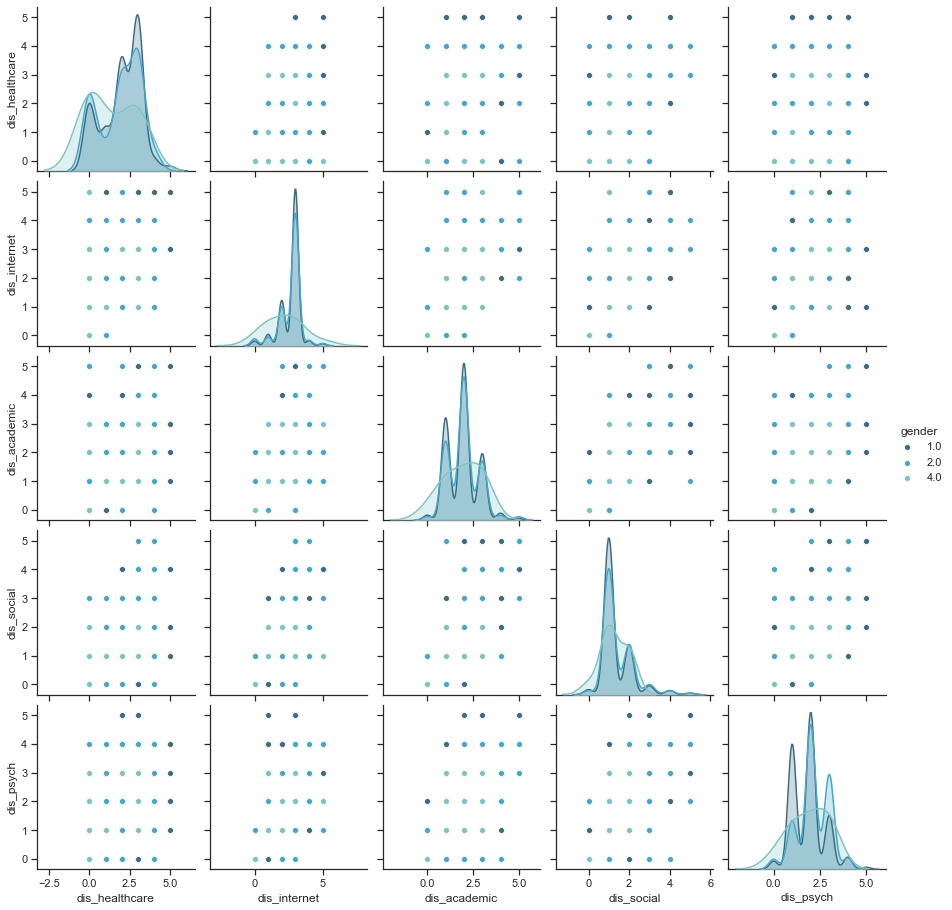

In [69]:
pair_plot_data = demo_data[['gender','dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']].copy()
sns.pairplot(pair_plot_data, hue="gender", palette="GnBu_d")

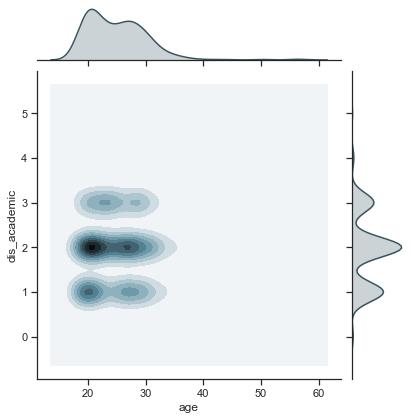

In [70]:
ax = sns.jointplot(x="age", y="dis_academic", kind='kde', data=eda_plot_data)

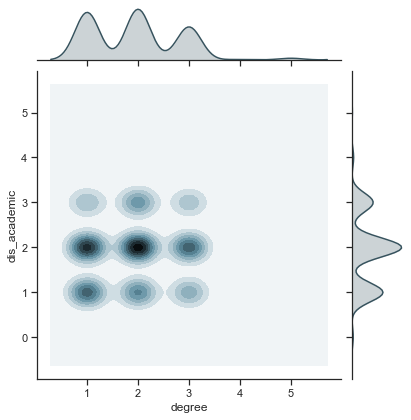

In [71]:
ax = sns.jointplot(x="degree", y="dis_academic", kind='kde', data=eda_plot_data)

Family       480
Roommates    207
Alone        117
Name: living_l, dtype: int64


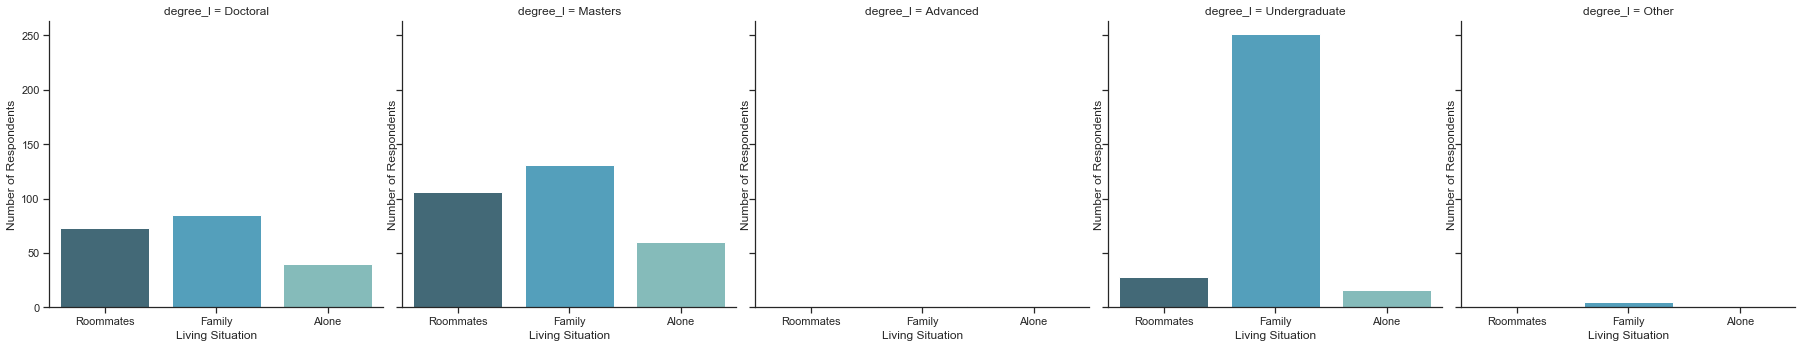

In [72]:
#figure for living and degree comparison
living_count = demo_data['living_l'].value_counts()
print(living_count)

living_plot = sns.catplot(x="living_l", data=demo_data, palette="GnBu_d",
                         col='degree_l', kind='count')
living_plot.set(xlabel='Living Situation', ylabel='Number of Respondents')
plt.show()

Same City            418
Different City       303
Different Country     54
On Campus             51
Name: location_l, dtype: int64


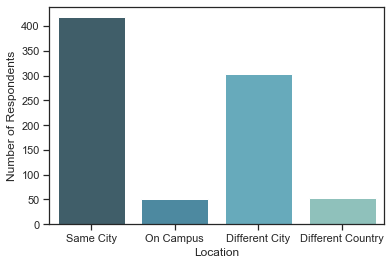

In [73]:
#figure for location
location_count = demo_data['location_l'].value_counts()
print(location_count)

location_plot = sns.countplot(x="location_l", data=demo_data, palette="GnBu_d")
location_plot.set(xlabel='Location', ylabel='Number of Respondents')
plt.show()

Same City            418
Different City       303
Different Country     54
On Campus             51
Name: location_l, dtype: int64


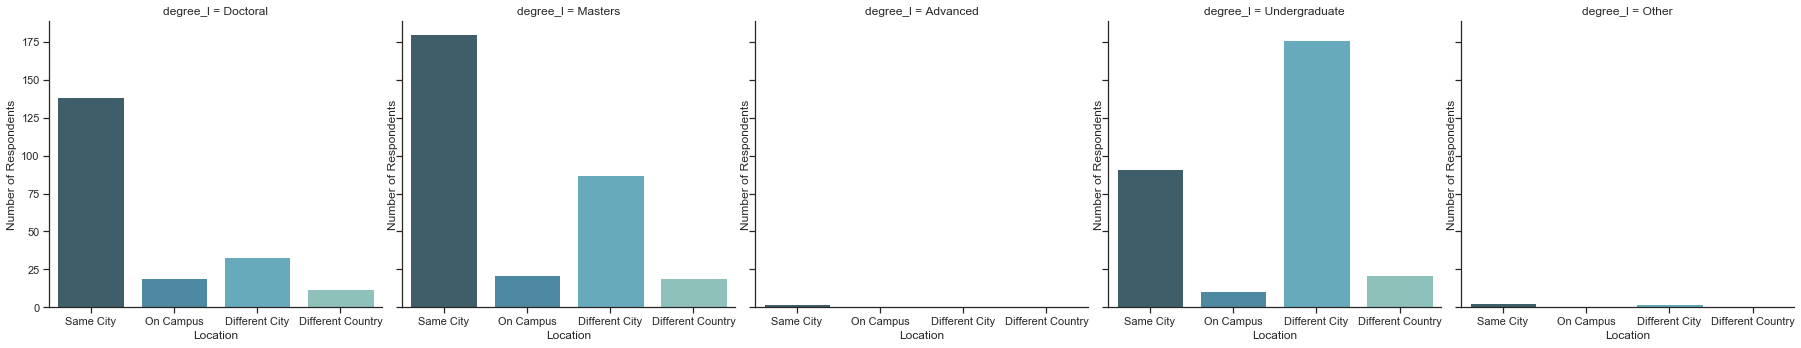

In [74]:
#figure for location by degree
location_count = demo_data['location_l'].value_counts()
print(location_count)

location_plot = sns.catplot(x="location_l", data=demo_data, palette="GnBu_d",
                               col="degree_l", kind="count")
location_plot.set(xlabel='Location', ylabel='Number of Respondents')
plt.show()

No     728
Yes    100
Name: vulnerable_l, dtype: int64


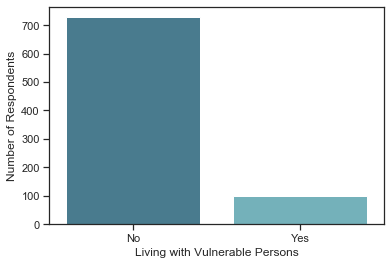

In [75]:
#figure for vulnerable
vulnerable_count = demo_data['vulnerable_l'].value_counts()
print(vulnerable_count)

vulnerable_plot = sns.countplot(x="vulnerable_l", data=demo_data, palette="GnBu_d")
vulnerable_plot.set(xlabel='Living with Vulnerable Persons', ylabel='Number of Respondents')
plt.show()

No     728
Yes    100
Name: vulnerable_l, dtype: int64


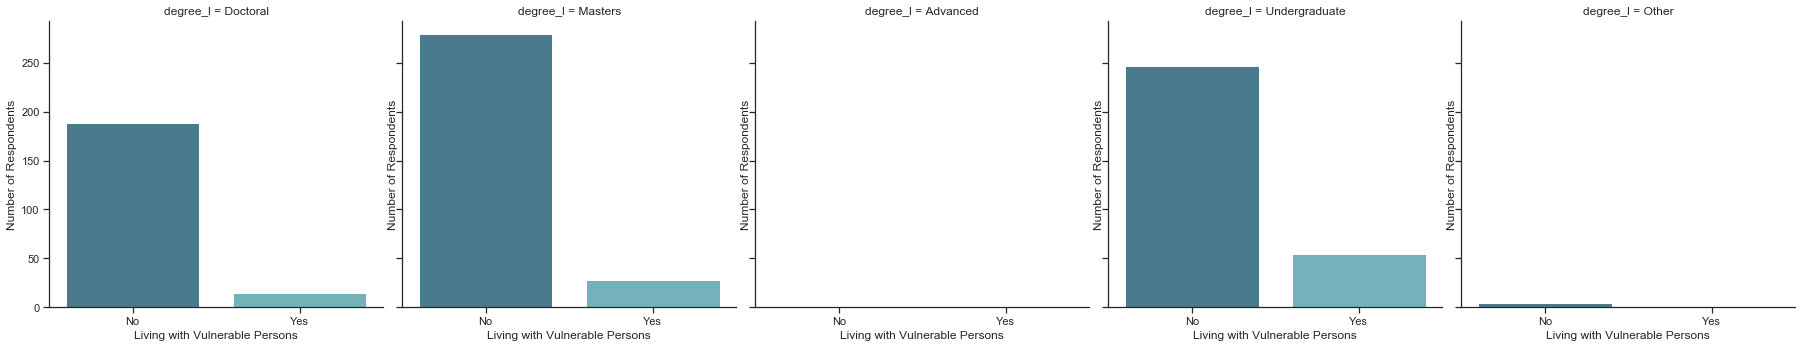

In [76]:
#figure for living with vulnerable people by degree
vulnerable_count = demo_data['vulnerable_l'].value_counts()
print(vulnerable_count)

vulnerable_plot = sns.catplot(x="vulnerable_l", data=demo_data, palette="GnBu_d",
                               col="degree_l", kind="count")

vulnerable_plot.set(xlabel='Living with Vulnerable Persons', ylabel='Number of Respondents')
plt.show()

## Free Response Data

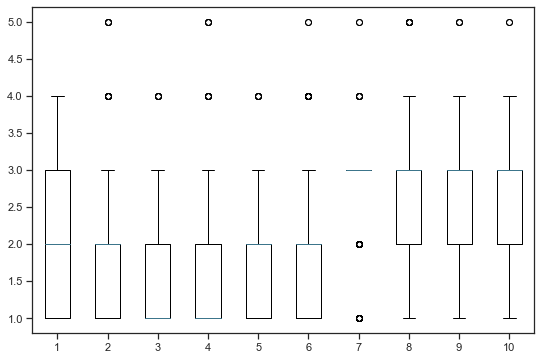

In [77]:
a_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_academic'] >0), 'dis_academic']
a_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_academic'] >0), 'dis_academic']
s_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_social'] >0), 'dis_social']
s_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_social'] >0), 'dis_social']
p_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_psych'] >0), 'dis_psych']
p_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_psych'] >0), 'dis_psych']
i_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_internet'] >0), 'dis_internet']
i_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_internet'] >0), 'dis_internet']
h_public  = text_updated.loc[(text_updated["type_inst"] =='Public') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']
h_private = text_updated.loc[(text_updated["type_inst"] =='Private') & (text_updated['dis_healthcare'] >0), 'dis_healthcare']

values = [a_public, a_private, s_public, s_private, p_public, p_private, i_public, i_private,  h_public, h_private]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(values)

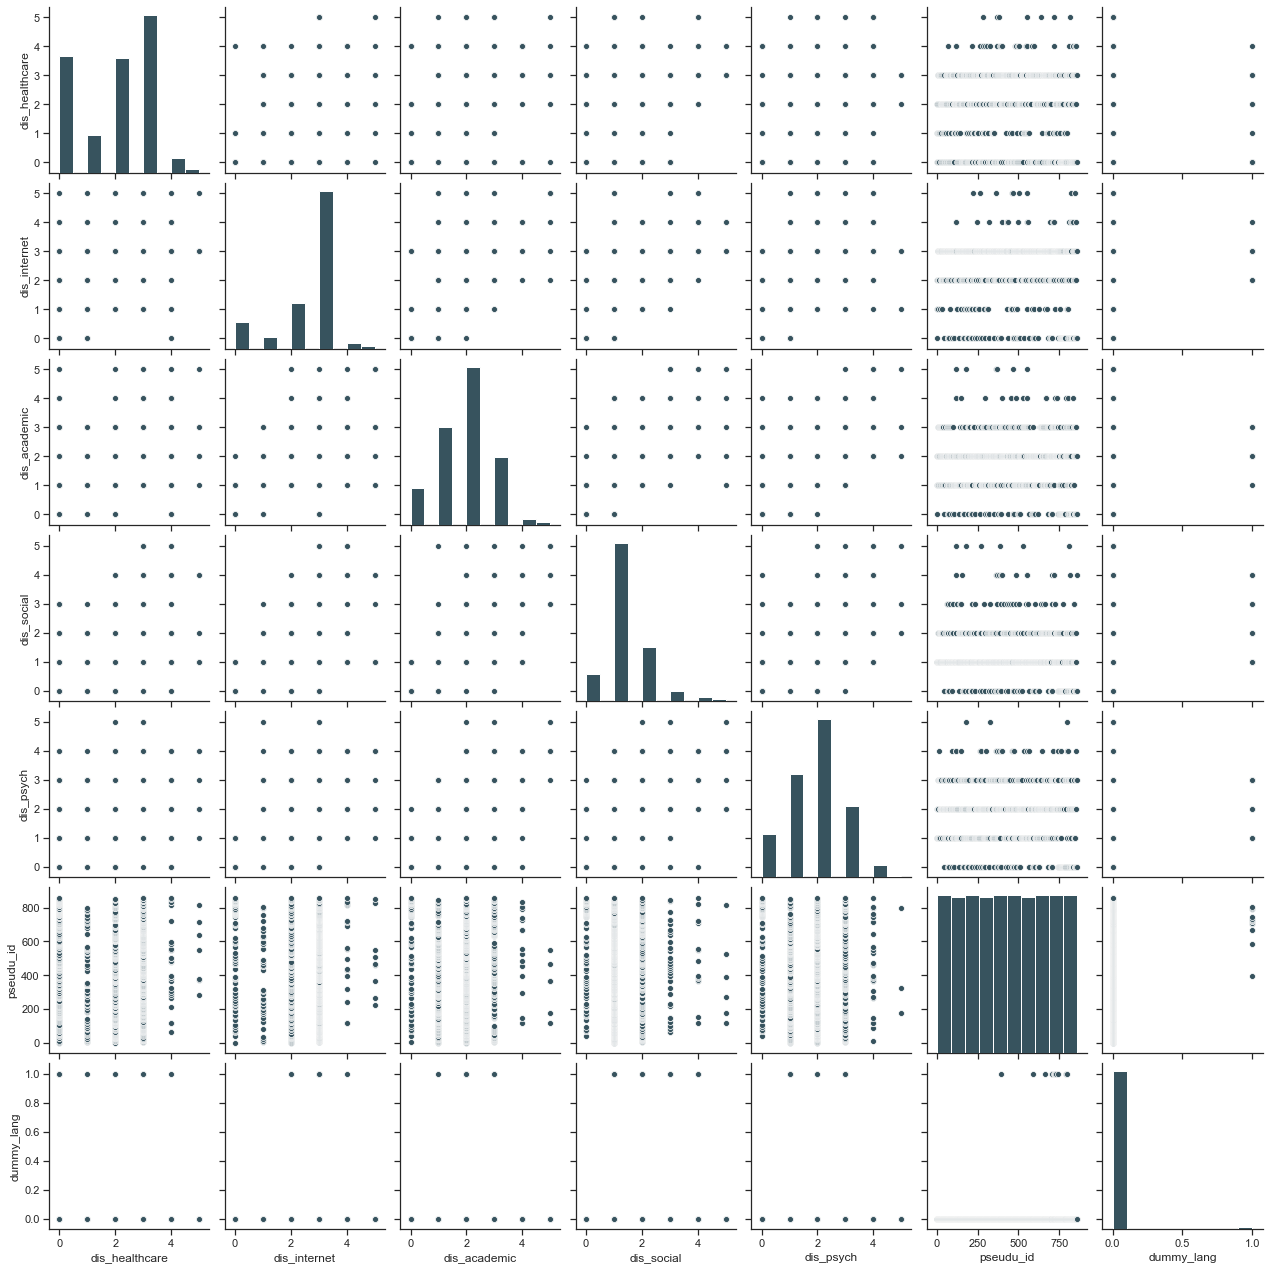

In [78]:
# Basic correlogram
sns.pairplot(text_updated)